In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importing the Data
df_data = pd.read_csv('flights.csv', low_memory=False)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [4]:
#Was used to copy the dataframe without loading the data again
df = df_data.copy()

In [15]:
print('Dataframe dimensions:', df.shape)

# Create the tab_info DataFrame with data types, null values, and percentage of null values
tab_info = pd.DataFrame({
    'Column Type': df.dtypes,                        # Column data types
    'Null Values (Count)': df.isnull().sum(),        # Count of null values
    'Null Values (%)': (df.isnull().sum() / df.shape[0]) * 100  # Percentage of null values
})

# Display the tab_info DataFrame
tab_info.head(31)


Dataframe dimensions: (5819079, 31)


,Column Type,Null Values (Count),Null Values (%)
YEAR,int64,0,0.000000
MONTH,int64,0,0.000000
DAY,int64,0,0.000000
DAY_OF_WEEK,int64,0,0.000000
AIRLINE,object,0,0.000000
FLIGHT_NUMBER,int64,0,0.000000
TAIL_NUMBER,object,14721,0.252978
ORIGIN_AIRPORT,object,0,0.000000
DESTINATION_AIRPORT,object,0,0.000000
SCHEDULED_DEPARTURE,int64,0,0.000000


In [19]:
airlines_data = pd.read_csv('airlines.csv')

# Setting 'IATA_CODE' as the index and converting 'AIRLINE' column to a dictionary
iata_to_airline_mapping = airlines_data.set_index('IATA_CODE')['AIRLINE'].to_dict()

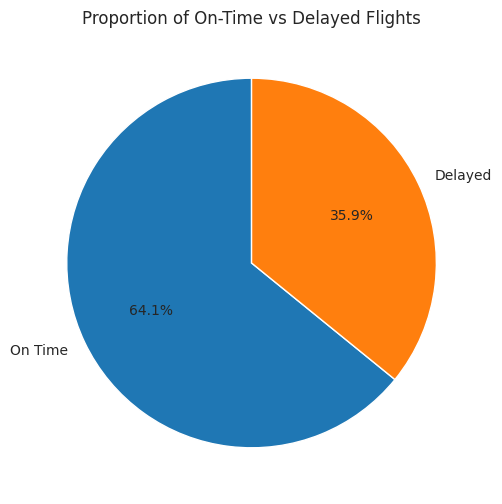

In [63]:
delayed = df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
delayed_counts = delayed.value_counts()

plt.figure(figsize=(6,6))
plt.pie(delayed_counts, labels=['On Time', 'Delayed'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of On-Time vs Delayed Flights')
plt.show()


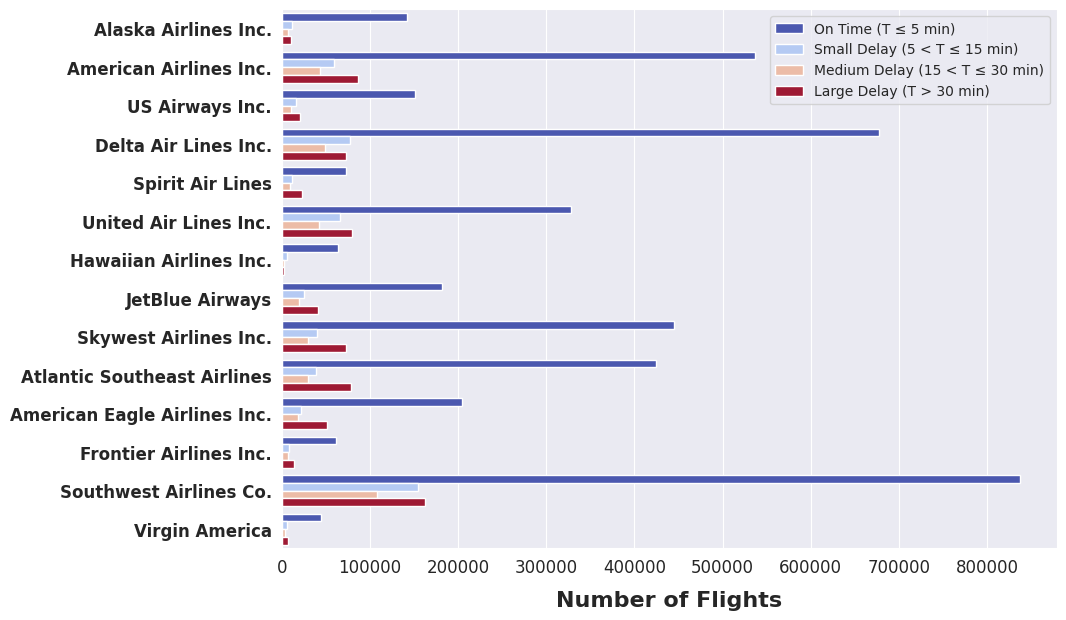

In [24]:

# Define the delay levels based on departure delay times
delay_category = lambda delay: (0 if delay <= 5 else (1 if delay <= 15 else (2 if delay <= 30 else 3)))
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_category)

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot a countplot to show the distribution of delay levels across airlines
sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df, palette='coolwarm', ax=ax)

# Replace the airline abbreviations with their full names using the provided mapping
full_airline_names = [iata_to_airline_mapping[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(full_airline_names)

# Customize the x and y tick labels with appropriate font sizes and styles
plt.setp(ax.get_xticklabels(), fontsize=12, weight='normal')
plt.setp(ax.get_yticklabels(), fontsize=12, weight='bold')

# Hide the y-axis label (since it already shows the airline names)
ax.yaxis.label.set_visible(False)

# Set the x-axis label for the flight count
plt.xlabel('Number of Flights', fontsize=16, weight='bold', labelpad=10)

# Customize the legend to reflect the delay categories
legend = ax.legend()
legend.get_texts()[0].set_text('On Time (T ≤ 5 min)')
legend.get_texts()[1].set_text('Small Delay (5 < T ≤ 15 min)')
legend.get_texts()[2].set_text('Medium Delay (15 < T ≤ 30 min)')
legend.get_texts()[3].set_text('Large Delay (T > 30 min)')

# Display the plot
plt.show()


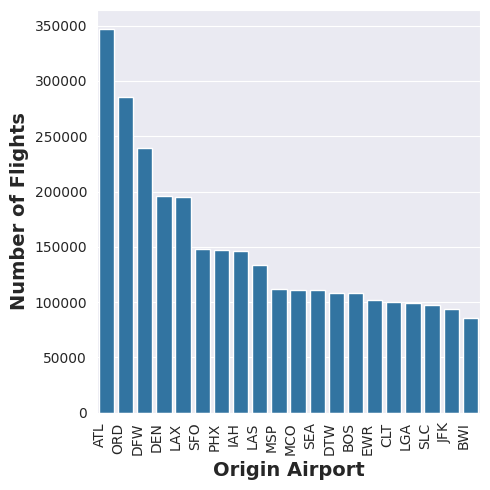

In [10]:

plt.figure(figsize=(5, 5))
axis = sns.countplot(x=df['ORIGIN_AIRPORT'], data = df,
              order=df['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)

# Set axis labels
plt.xlabel('Origin Airport', fontsize=14, weight='bold')
plt.ylabel('Number of Flights', fontsize=14, weight='bold')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")

# Adjust the layout to fit all elements
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
print("Number of airports: {}".format(len(df['ORIGIN_AIRPORT'].unique())))

Number of airports: 628


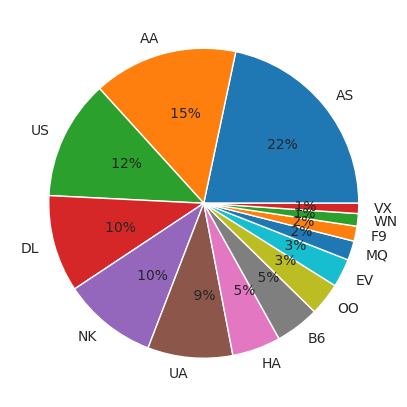

In [5]:
axis = plt.subplots(figsize=(5,7))
Name = df["AIRLINE"].unique()
size = df["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

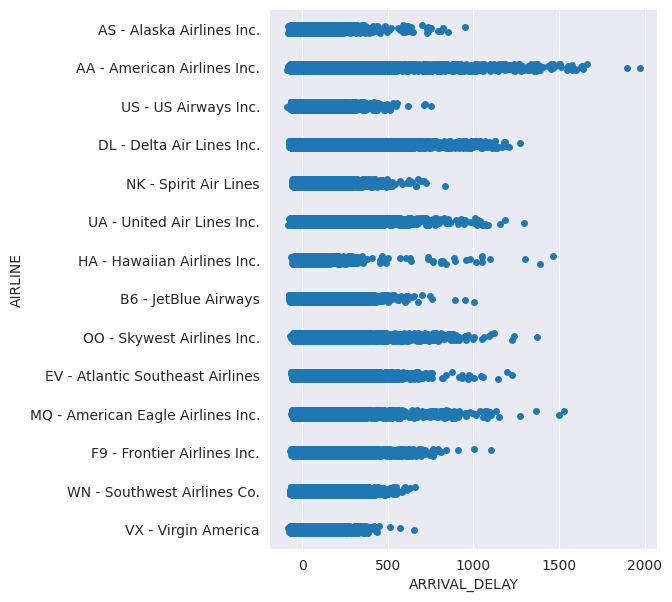

In [36]:

# Create figure and axis for the scatter plot
fig, ax = plt.subplots(figsize=(5, 7))

# Strip plot showing arrival delay by airline
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, dodge=True, jitter=True)

# Replace IATA codes with both the IATA code and full airline names using iata_to_airline_mapping
full_labels = [f"{code} - {iata_to_airline_mapping.get(code, code)}" for code in df['AIRLINE'].unique()]
ax.set_yticks(ax.get_yticks())  # Ensure the ticks are set before modifying tick labels
ax.set_yticklabels(full_labels)

# Remove spines for a cleaner look
sns.despine(bottom=True, left=True)

# Display the plot
plt.show()


In [37]:
from sklearn.preprocessing import LabelEncoder

#Feature Coloums Left
#'DEPARTURE_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY','AIR_SYSTEM_DELAY', 'WEATHER_DELAY',
label_encoder = LabelEncoder()

def prep_data(df):
    
    df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
    df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype(str)
        
    delay = []
    for row in df['ARRIVAL_DELAY']:
        if row > 60:
            delay.append(3)
        elif row > 30:
            delay.append(2)
        elif row > 15:
            delay.append(1)
        else:
            delay.append(0)
    df['DELAY'] = delay
    df = df.drop([
        'ARRIVAL_DELAY', 'SECURITY_DELAY', 'TAXI_OUT', 'TAXI_IN', 
        'WHEELS_OFF', 'WHEELS_ON', 'AIR_TIME', 'ELAPSED_TIME', 'ARRIVAL_TIME', 
        'DEPARTURE_TIME', 'CANCELLED', 'CANCELLATION_REASON' , "DIVERTED", 'DAY', 'YEAR','MONTH', 'SCHEDULED_TIME', 'AIRLINE', 'DISTANCE', 'DAY_OF_WEEK'
    ], axis=1)
    
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is categorical
            df[column] = label_encoder.fit_transform(df[column])

    df.dropna(how='any', inplace=True)
    return df


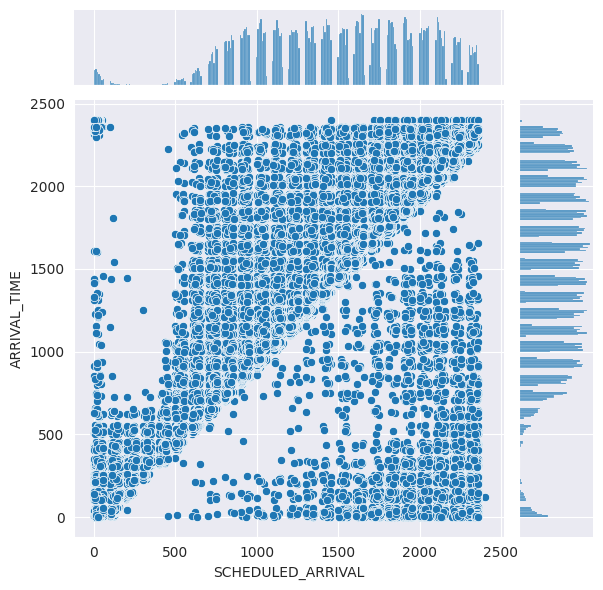

In [38]:
sns.jointplot(data=df, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

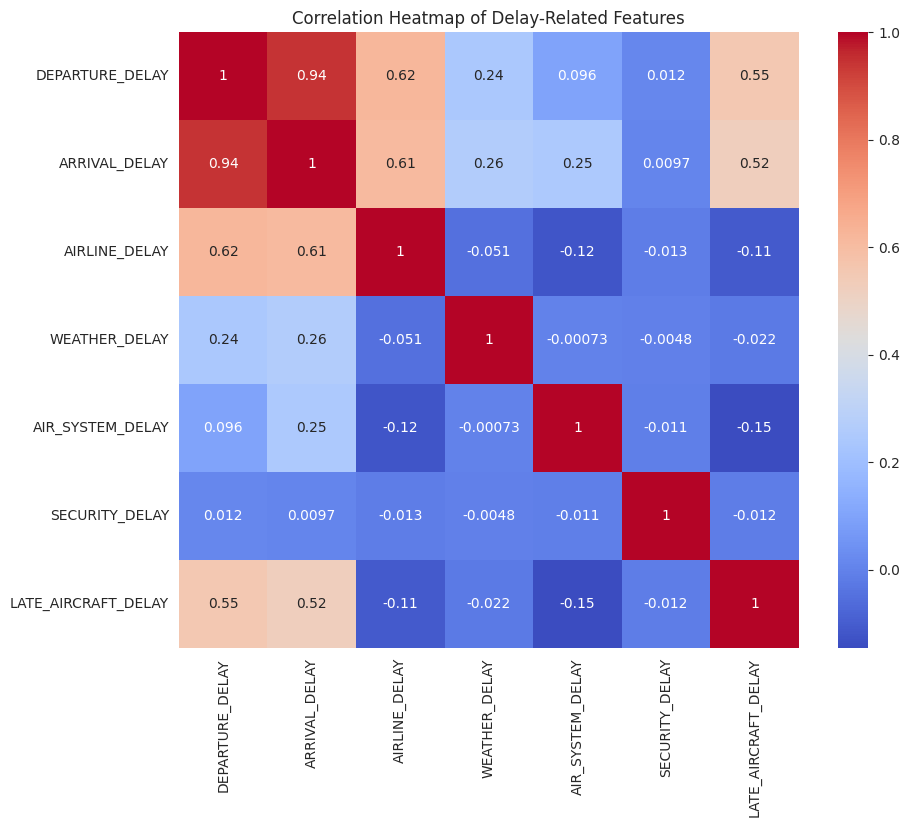

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select delay-related features
delay_related = df[['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(delay_related.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Delay-Related Features")
plt.show()


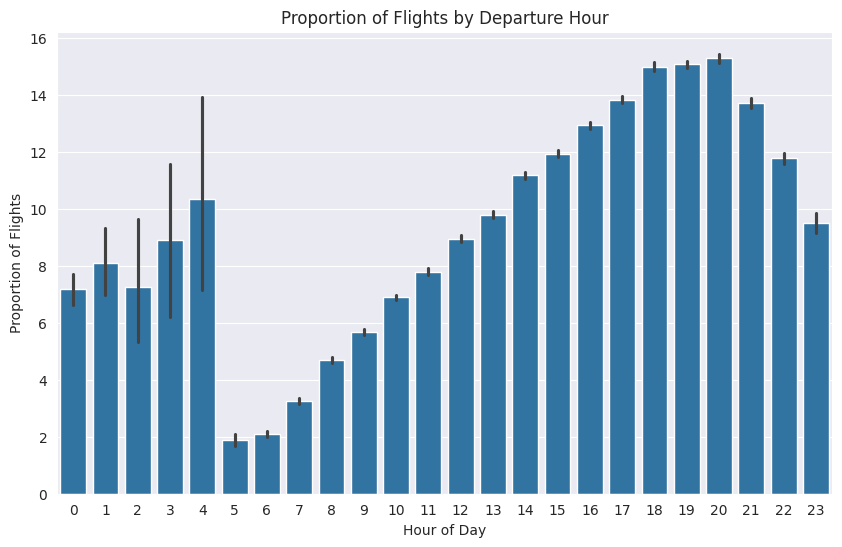

In [42]:
# Extract hour from scheduled departure time
df['DEPARTURE_HOUR'] = df['SCHEDULED_DEPARTURE'].apply(lambda x: int(str(x).zfill(4)[:2]))

# Create a plot showing the proportion of delayed flights per departure hour
plt.figure(figsize=(10,6))
sns.barplot(x='DEPARTURE_HOUR', y='DEPARTURE_DELAY', data=df)
plt.title('Proportion of Flights by Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Proportion of Flights')
plt.show()


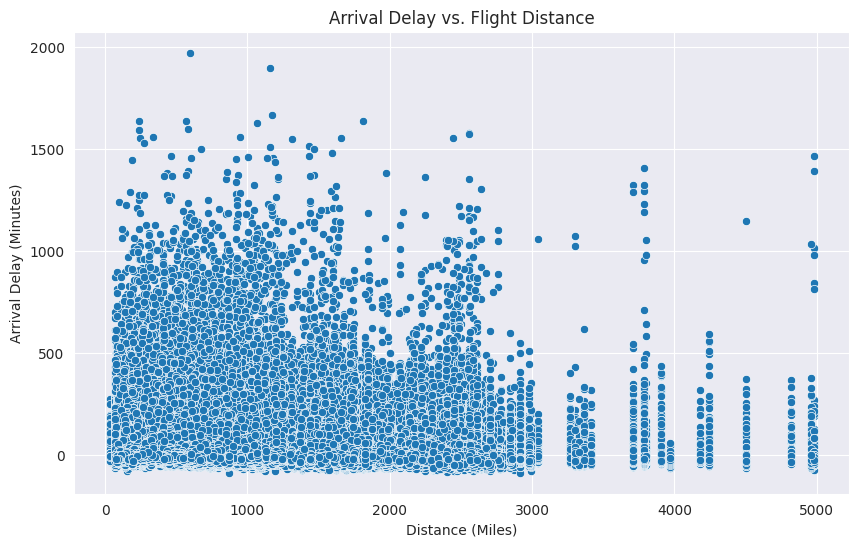

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='DISTANCE', y='ARRIVAL_DELAY', data=df)
plt.title('Arrival Delay vs. Flight Distance')
plt.xlabel('Distance (Miles)')
plt.ylabel('Arrival Delay (Minutes)')
plt.show()


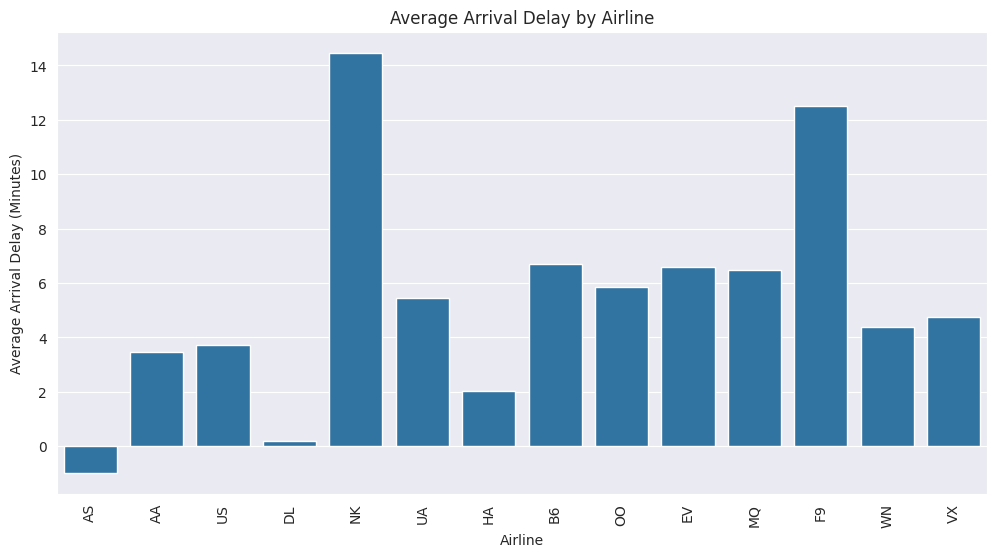

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data=df, errorbar=None)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.xticks(rotation=90)
plt.show()

In [57]:
df = prep_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063439 entries, 27 to 5819071
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   FLIGHT_NUMBER        1063439 non-null  int64  
 1   TAIL_NUMBER          1063439 non-null  int64  
 2   ORIGIN_AIRPORT       1063439 non-null  int64  
 3   DESTINATION_AIRPORT  1063439 non-null  int64  
 4   SCHEDULED_DEPARTURE  1063439 non-null  int64  
 5   DEPARTURE_DELAY      1063439 non-null  float64
 6   SCHEDULED_ARRIVAL    1063439 non-null  int64  
 7   AIR_SYSTEM_DELAY     1063439 non-null  float64
 8   AIRLINE_DELAY        1063439 non-null  float64
 9   LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 10  WEATHER_DELAY        1063439 non-null  float64
 11  DELAY                1063439 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 105.5 MB


In [58]:
df.head(10)

,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,AIR_SYSTEM_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY
27,597,2141,522,421,115,12.0,542,25.0,0.0,0.0,0.0,1
30,168,2722,545,535,125,72.0,549,43.0,0.0,0.0,0.0,2
35,17,1289,480,448,145,0.0,555,0.0,15.0,0.0,0.0,0
50,1030,678,348,500,307,-3.0,500,20.0,0.0,0.0,0.0,1
52,2134,874,591,500,400,95.0,605,0.0,85.0,0.0,0.0,3
55,2276,2827,591,333,438,72.0,739,17.0,72.0,0.0,0.0,3
70,1057,1357,392,510,515,108.0,856,0.0,0.0,0.0,102.0,3
73,425,436,542,546,520,60.0,850,0.0,60.0,0.0,0.0,2
74,89,1557,457,510,520,58.0,841,0.0,54.0,0.0,0.0,2
86,328,1973,391,393,530,53.0,835,13.0,53.0,0.0,0.0,3


In [59]:
corr_matrix = df.corr()
print(corr_matrix['DELAY'].sort_values(ascending=False))


DELAY                  1.000000
DEPARTURE_DELAY        0.611960
LATE_AIRCRAFT_DELAY    0.431899
AIRLINE_DELAY          0.289193
AIR_SYSTEM_DELAY       0.204263
WEATHER_DELAY          0.139379
SCHEDULED_DEPARTURE    0.064313
SCHEDULED_ARRIVAL      0.052790
FLIGHT_NUMBER          0.024813
ORIGIN_AIRPORT         0.013353
DESTINATION_AIRPORT    0.011707
TAIL_NUMBER            0.004965
Name: DELAY, dtype: float64


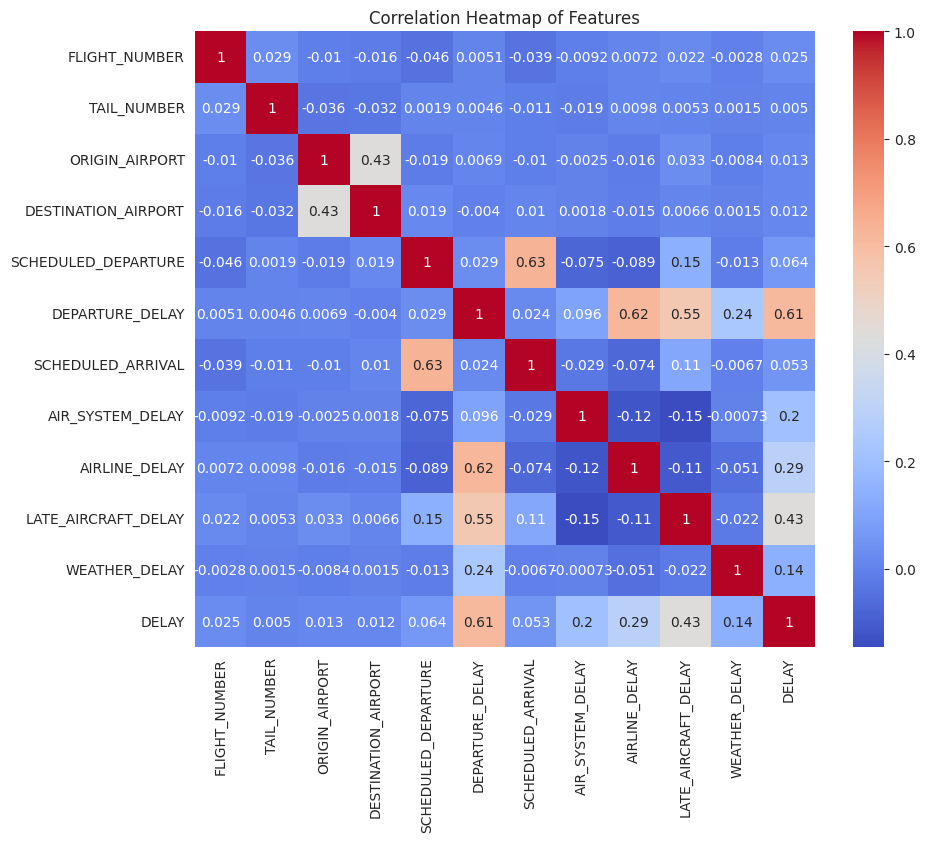

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()
